## Problem Statement

## Description: Classify patients as having chronic kidney disease or not using Machine Learning

* The Chronic Kidney Disease Dataset consists of 24 features and 1 target variable( 11 numeric, 14 nominal/categorical)

* The numerical features include: 'age', 'blood_pressure', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'

* The categorical features include: 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification'

* It is a binary classification problem.

## Relevant Information about the Dataset:
			age		-	age	
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo	-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet	-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class	-	classification (CKD-Chronic Kidney Disease / notckd- Not Chronic Kidney Disease	

* 4.Number of Instances:  400 (250 CKD, 150 notckd)

* 5.Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 

* 6.Attribute Information :

 	1.Age(numerical): age in years
    
 	2.Blood Pressure(numerical): bp in mm/Hg
	       	
 	3.Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
	  	
 	4.Albumin(nominal): al - (0,1,2,3,4,5)
		
 	5.Sugar(nominal): su - (0,1,2,3,4,5)
		
 	6.Red Blood Cells(nominal): rbc - (normal,abnormal)
		
 	7.Pus Cell (nominal): pc - (normal,abnormal)
		
 	8.Pus Cell clumps(nominal): pcc - (present,notpresent)
		
 	9.Bacteria(nominal): ba  - (present,notpresent)
		
 	10.Blood Glucose Random(numerical): bgr in mgs/dl		
		
 	11.Blood Urea(numerical): bu in mgs/dl
		
 	12.Serum Creatinine(numerical): sc in mgs/dl	
		
 	13.Sodium(numerical): sod in mEq/L
		
 	14.Potassium(numerical): pot in mEq/L
		
 	15.Hemoglobin(numerical): hemo in gms
		
 	16.Packed  Cell Volume(numerical)
    
 	17.White Blood Cell Count(numerical): wc in cells/cumm
		
 	18.Red Blood Cell Count(numerical): rc in millions/cmm	
		
 	19.Hypertension(nominal): htn - (yes,no)	
		
 	20.Diabetes Mellitus(nominal): dm - (yes,no)
		
 	21.Coronary Artery Disease(nominal): cad - (yes,no)
		
 	22.Appetite(nominal): appet - (good,poor)	
		
 	23.Pedal Edema(nominal): pe - (yes,no)
			
 	24.Anemia(nominal): ane - (yes,no)
		
 	25.Class (nominal): classification - (ckd,notckd)	
		

* 7. Missing Attribute Values: Yes(Denoted by "?")

* 8. Class Distribution: ( 2 classes)
    		Class 	  Number of instances
    		ckd          	  250
    		notckd       	  150   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score, f1_score, roc_auc_score, log_loss, roc_curve  
from sklearn.preprocessing import OrdinalEncoder

pd.options.display.max_rows=None
pd.options.display.max_columns=None


In C:\Users\Chandru\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Chandru\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Chandru\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Chandru\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor rele

In [2]:
df=pd.read_csv('chronic_kidney_disease.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df=pd.read_csv('chronic_kidney_disease.csv', na_values=['?'])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wbccc   295 non-null    object 
 17  rbcc    270 non-null    object 
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [5]:
# col_names={"bp":"blood_pressure",
#           "sg":"specific_gravity",
#           "al":"albumin",
#           "su":"sugar",
#           "rbc":"red_blood_cells",
#           "pc":"pus_cell",
#           "pcc":"pus_cell_clumps",
#           "ba":"bacteria",
#           "bgr":"blood_glucose_random",
#           "bu":"blood_urea",
#           "sc":"serum_creatinine",
#           "sod":"sodium",
#           "pot":"potassium",
#           "hemo":"haemoglobin",
#           "pcv":"packed_cell_volume",
#           "wc":"white_blood_cell_count",
#           "rc":"red_blood_cell_count",
#           "htn":"hypertension",
#           "dm":"diabetes_mellitus",
#           "cad":"coronary_artery_disease",
#           "appet":"appetite",
#           "pe":"pedal_edema",
#           "ane":"anemia"}

# df.rename(columns=col_names, inplace=True)

In [6]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

#Change the value \t43 to 43

In [7]:
df['pcv']=df['pcv'].replace(to_replace='\t43', value=43)

In [8]:
df['wbccc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

#Change the value \t6200 to 6200 and \t8400 to 8400

In [9]:
df['wbccc']=df['wbccc'].replace(to_replace='\t6200', value=6200)
df['wbccc']=df['wbccc'].replace(to_replace='\t8400', value=8400)

In [10]:
df['rbcc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '\t?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [11]:
df=pd.read_csv('chronic_kidney_disease.csv', na_values=['?','\t?'])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [12]:
#Change the data types of sg, al, su, pcv, wbccc, rbcc as per data definition
df['sg']=df['sg'].astype('object')
df['al']=df['al'].astype('object')
df['su']=df['su'].astype('object')
df['pcv']=df['pcv'].astype('float')
df['wbccc']=df['wbccc'].astype('float')
df['rbcc']=df['rbcc'].astype('float')

In [13]:
df.head().T

,0,1,2,3,4
age,48.0,7.0,62.0,48.0,51.0
bp,80.0,50.0,80.0,70.0,80.0
sg,1.02,1.02,1.01,1.005,1.01
al,1.0,4.0,2.0,4.0,2.0
su,0.0,0.0,3.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121.0,NaN,423.0,117.0,106.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    object 
 3   al      354 non-null    object 
 4   su      351 non-null    object 
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbccc   294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [15]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/len(df)).sort_values(ascending=False)
miss_val=pd.DataFrame({
    'Total Missing Values': total,
    'Percentage of Missing Values':percent
})
miss_val

,Total Missing Values,Percentage of Missing Values
rbc,152,38.00
rbcc,131,32.75
wbccc,106,26.50
pot,88,22.00
sod,87,21.75
pcv,71,17.75
pc,65,16.25
hemo,52,13.00
su,49,12.25
sg,47,11.75


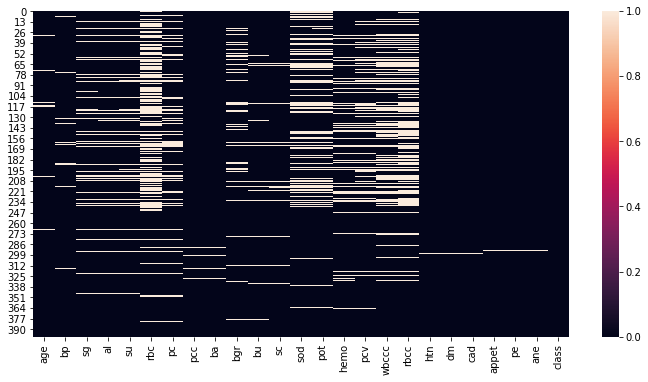

In [16]:
#Visualizing the null values using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())
plt.show()

In [17]:
df_num=df.select_dtypes(include='number')
df_num

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
0,48.0,80.0,121.0,36.0,1.20,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,NaN,18.0,0.80,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,423.0,53.0,1.80,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,117.0,56.0,3.80,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,106.0,26.0,1.40,NaN,NaN,11.6,35.0,7300.0,4.6
5,60.0,90.0,74.0,25.0,1.10,142.0,3.2,12.2,39.0,7800.0,4.4
6,68.0,70.0,100.0,54.0,24.00,104.0,4.0,12.4,36.0,NaN,NaN
7,24.0,NaN,410.0,31.0,1.10,NaN,NaN,12.4,44.0,6900.0,5.0
8,52.0,100.0,138.0,60.0,1.90,NaN,NaN,10.8,33.0,9600.0,4.0
9,53.0,90.0,70.0,107.0,7.20,114.0,3.7,9.5,29.0,12100.0,3.7


In [18]:
df_num.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [19]:
plt.rcParams['figure.figsize'] = [15,8]

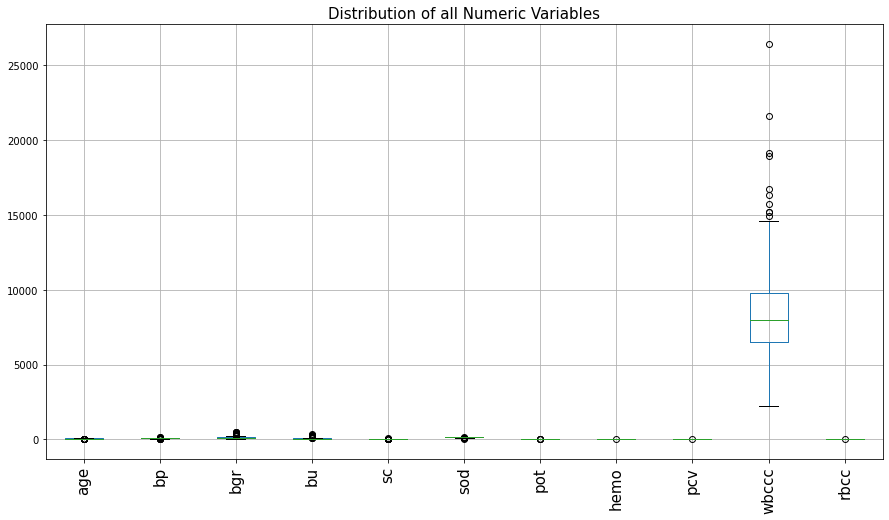

In [20]:
#Distribution of all numeric Variables
df_num.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

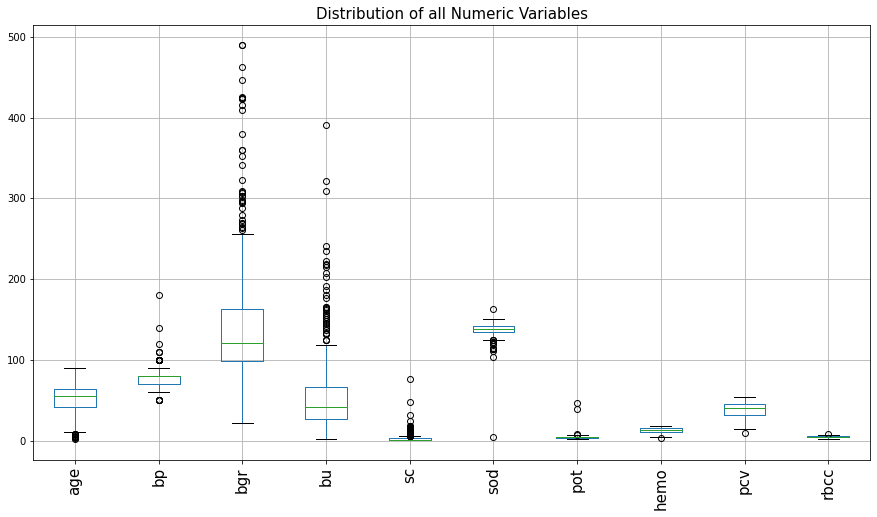

In [21]:
df_num.loc[:, ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'rbcc']].boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

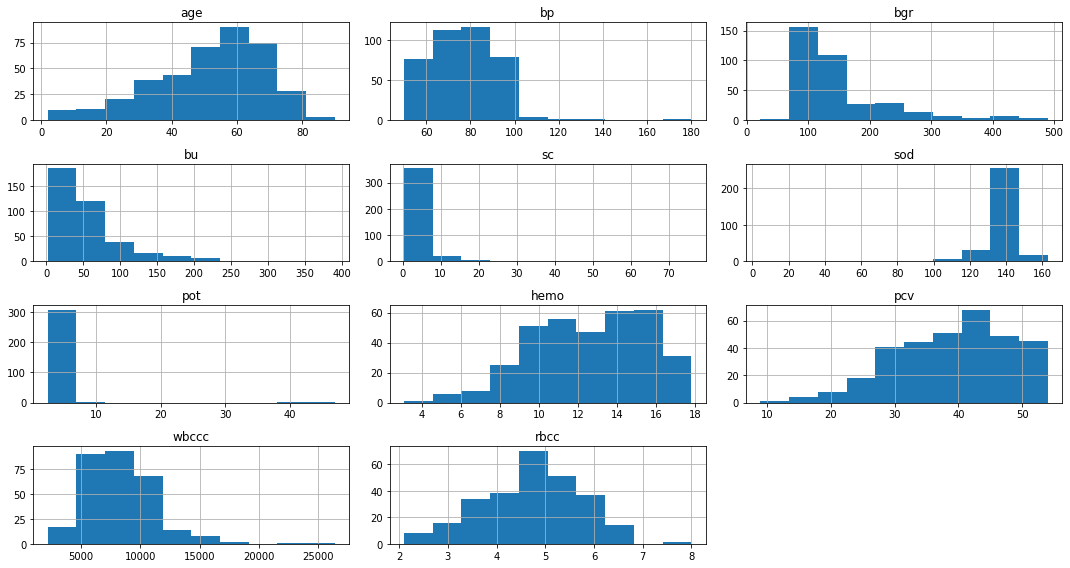

Skewness:


age      -0.668259
bp        1.605429
bgr       2.010773
bu        2.634374
sc        7.509538
sod      -6.996569
pot      11.582956
hemo     -0.335095
pcv      -0.433679
wbccc     1.621589
rbcc     -0.183329
dtype: float64

In [22]:
#Distribution of Numeric Variables by histogram
df_num.hist()
plt.tight_layout()
plt.show()
print('Skewness:')
df_num.skew()

In [23]:
df.head().T

,0,1,2,3,4
age,48.0,7.0,62.0,48.0,51.0
bp,80.0,50.0,80.0,70.0,80.0
sg,1.02,1.02,1.01,1.005,1.01
al,1.0,4.0,2.0,4.0,2.0
su,0.0,0.0,3.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal
pc,normal,normal,normal,abnormal,normal
pcc,notpresent,notpresent,notpresent,present,notpresent
ba,notpresent,notpresent,notpresent,notpresent,notpresent
bgr,121.0,NaN,423.0,117.0,106.0


In [24]:
df_num.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN


In [25]:
from sklearn.impute import KNNImputer
imp=KNNImputer()
df1=imp.fit_transform(df_num)
df2=pd.DataFrame(df1, columns=df_num.columns, index=df_num.index )
df2.head().T

,0,1,2,3,4
age,48.0,7.00,62.0,48.0,51.00
bp,80.0,50.00,80.0,70.0,80.00
bgr,121.0,113.00,423.0,117.0,106.00
bu,36.0,18.00,53.0,56.0,26.00
sc,1.2,0.80,1.8,3.8,1.40
sod,138.8,137.40,133.8,111.0,138.40
pot,4.3,4.00,4.2,2.5,3.98
hemo,15.4,11.30,9.6,11.2,11.60
pcv,44.0,38.00,31.0,32.0,35.00
wbccc,7800.0,6000.00,7500.0,6700.0,7300.00


In [26]:
df2.isnull().sum()

age      0
bp       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbccc    0
rbcc     0
dtype: int64

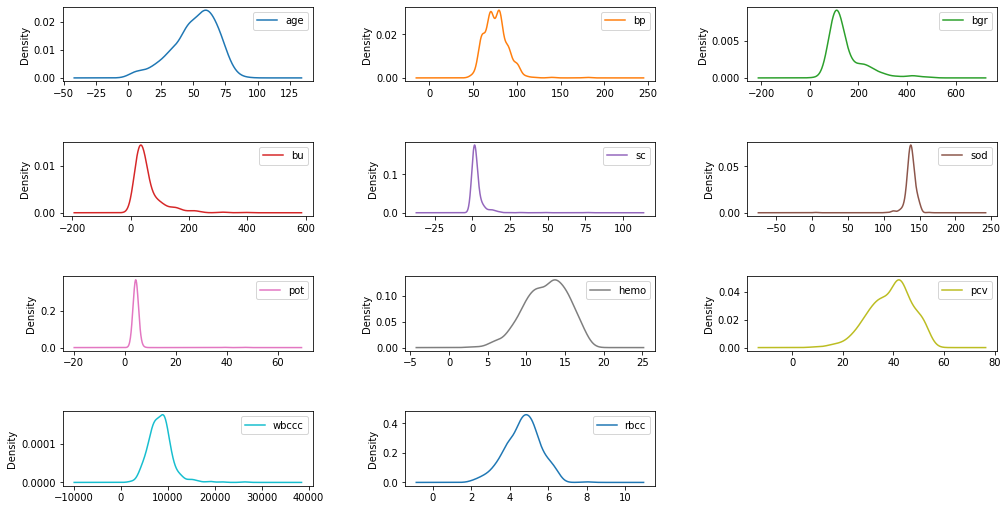

Skewness:


age      -0.667964
bp        1.599739
bgr       1.981195
bu        2.637802
sc        7.613328
sod      -7.702117
pot      13.056843
hemo     -0.374569
pcv      -0.467442
wbccc     1.703251
rbcc     -0.182550
dtype: float64

In [27]:
df2.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False)
plt.tight_layout(pad=4)
plt.show()
print('Skewness:')
df2.skew()

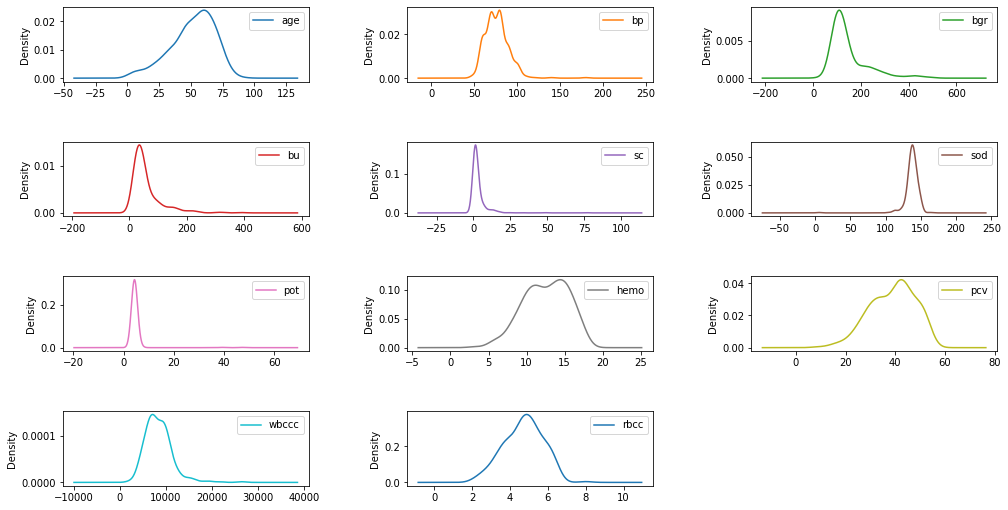

Skewness:


age      -0.668259
bp        1.605429
bgr       2.010773
bu        2.634374
sc        7.509538
sod      -6.996569
pot      11.582956
hemo     -0.335095
pcv      -0.433679
wbccc     1.621589
rbcc     -0.183329
dtype: float64

In [28]:
df_num.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False)
plt.tight_layout(pad=4)
plt.show()
print('Skewness:')
df_num.skew()

In [29]:
def impute_nan_random(df,variable):
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    df[variable+'_random']=df[variable]
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [30]:
for column in df_num.columns:
    impute_nan_random(df_num,column)

In [31]:
df_num.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,age_random,bp_random,bgr_random,bu_random,sc_random,sod_random,pot_random,hemo_random,pcv_random,wbccc_random,rbcc_random
0,48.0,80.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,48.0,80.0,121.0,36.0,1.2,139.0,3.8,15.4,44.0,7800.0,5.2
1,7.0,50.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,7.0,50.0,410.0,18.0,0.8,136.0,4.9,11.3,38.0,6000.0,4.5
2,62.0,80.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,62.0,80.0,423.0,53.0,1.8,140.0,4.8,9.6,31.0,7500.0,6.4
3,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,48.0,70.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,51.0,80.0,106.0,26.0,1.4,136.0,4.0,11.6,35.0,7300.0,4.6


In [32]:
df_rand=pd.DataFrame({
    'age': df_num['age_random'],
    'bp': df_num['bp_random'],
    'bgr': df_num['bgr_random'],
    'bu': df_num['bgr_random'],
    'sc': df_num['sc_random'],
    'sod': df_num['sod_random'],
    'pot': df_num['pot_random'],
    'hemo': df_num['hemo_random'],
    'pcv': df_num['pcv_random'],
    'wbccc': df_num['wbccc_random'],
    'rbcc': df_num['rbcc_random']  
})
df_rand.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
0,48.0,80.0,121.0,121.0,1.2,139.0,3.8,15.4,44.0,7800.0,5.2
1,7.0,50.0,410.0,410.0,0.8,136.0,4.9,11.3,38.0,6000.0,4.5


In [33]:
df_num=df_num.drop(['age_random', 'bp_random', 'bgr_random', 'bgr_random', 'sc_random','sod_random', 'pot_random', 'hemo_random', 'pcv_random', 'wbccc_random', 'rbcc_random'], axis=1)

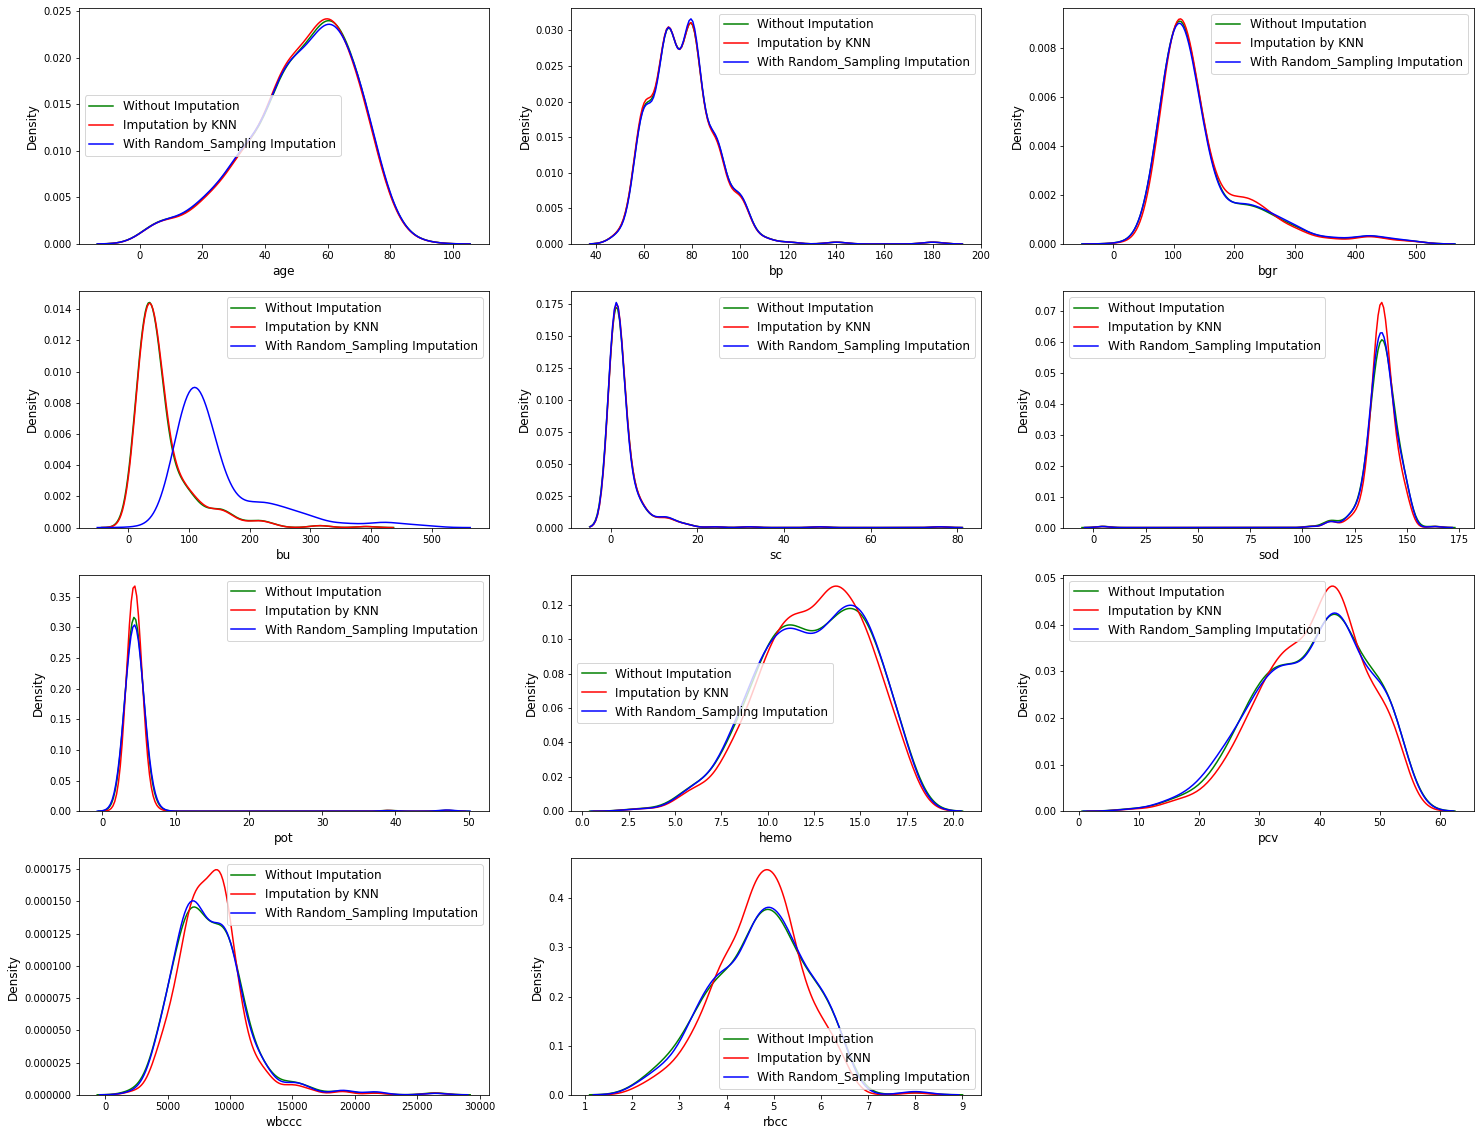

In [34]:
plt.figure(figsize=(25,20))
a=df2.columns
j=1
for i in range(0,df2.shape[1]):
    plt.subplot(4,3,j)
    sns.kdeplot(df_num.iloc[:,i],color='g',label='Without Imputation')
    sns.kdeplot(df2.iloc[:,i],color='r',label='Imputation by KNN')
    sns.kdeplot(df_rand.iloc[:,i],color='b',label='With Random_Sampling Imputation')
    
    plt.xlabel(a[i],size = 12)
    plt.ylabel('Density', size = 12)
    plt.legend(loc="best",prop={'size': 12})
    j=j+1

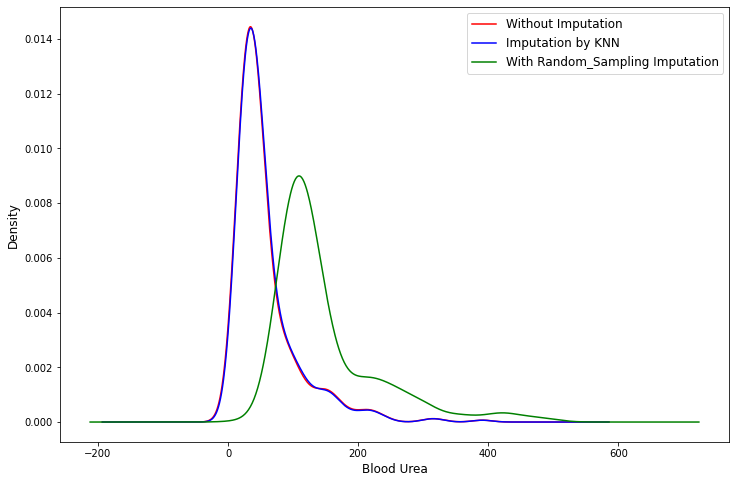

In [35]:
plt.figure(figsize=(12,8))
df_num['bu'].plot(kind='kde', color='r',label='Without Imputation')
df2['bu'].plot(kind='kde', color='b',label='Imputation by KNN')
df_rand['bu'].plot(kind='kde', color='g',label='With Random_Sampling Imputation')
    
plt.xlabel('Blood Urea',size = 12)
plt.ylabel('Density', size = 12)
plt.legend(loc="best",prop={'size': 12})

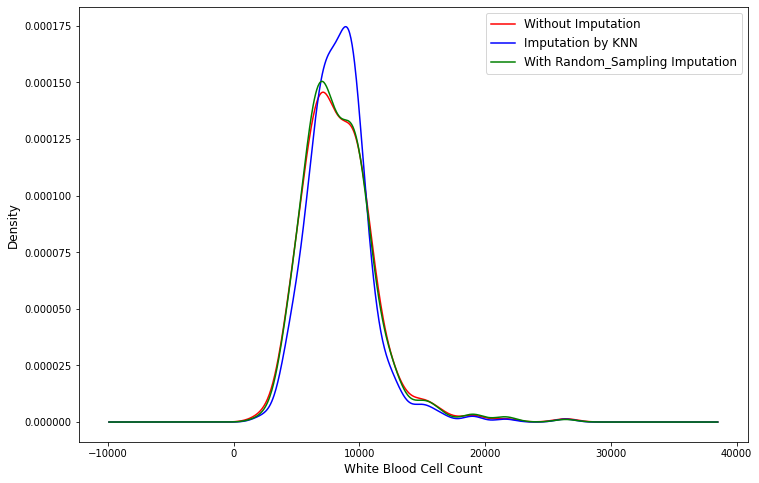

In [36]:
plt.figure(figsize=(12,8))
df_num['wbccc'].plot(kind='kde', color='r',label='Without Imputation')
df2['wbccc'].plot(kind='kde', color='b',label='Imputation by KNN')
df_rand['wbccc'].plot(kind='kde', color='g',label='With Random_Sampling Imputation')
    
plt.xlabel('White Blood Cell Count',size = 12)
plt.ylabel('Density', size = 12)
plt.legend(loc="best",prop={'size': 12})

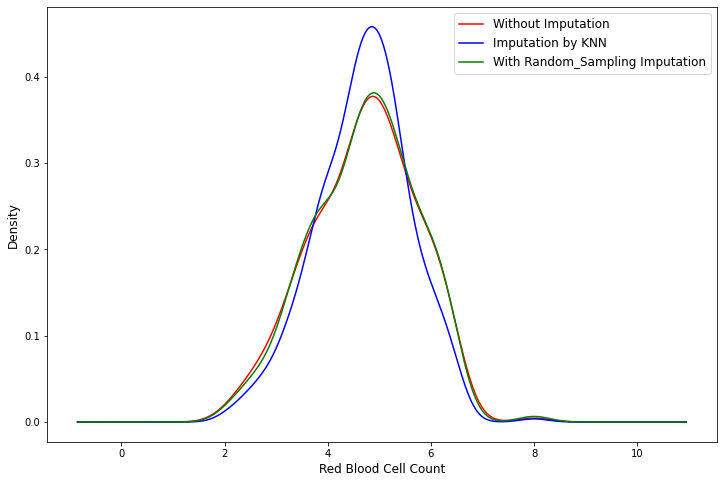

In [37]:
plt.figure(figsize=(12,8))
df_num['rbcc'].plot(kind='kde', color='r',label='Without Imputation')
df2['rbcc'].plot(kind='kde', color='b',label='Imputation by KNN')
df_rand['rbcc'].plot(kind='kde', color='g',label='With Random_Sampling Imputation')
    
plt.xlabel('Red Blood Cell Count',size = 12)
plt.ylabel('Density', size = 12)
plt.legend(loc="best",prop={'size': 12})

## Encoding

In [38]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,1.01,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,1.005,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,1.01,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [39]:
dfv1=pd.concat([df2, df_cat],1)
dfv1.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [40]:
print(df['rbc'].unique(), df['rbc'].value_counts(), sep='\n')

[nan 'normal' 'abnormal']
normal      201
abnormal     47
Name: rbc, dtype: int64


In [41]:
dfv1['rbc']=dfv1['rbc'].replace({'normal':0, 'abnormal':1})

In [42]:
print(df['pc'].unique(), df['pc'].value_counts(), sep='\n')

['normal' 'abnormal' nan]
normal      259
abnormal     76
Name: pc, dtype: int64


In [43]:
dfv1['pc']=dfv1['pc'].replace({'normal':0, 'abnormal':1})

In [44]:
print(df['pcc'].unique(), df['pcc'].value_counts(), sep='\n')

['notpresent' 'present' nan]
notpresent    354
present        42
Name: pcc, dtype: int64


In [45]:
dfv1['pcc']=dfv1['pcc'].replace({'notpresent':0, 'present':1})

In [46]:
print(df['ba'].unique(), df['ba'].value_counts(), sep='\n')

['notpresent' 'present' nan]
notpresent    374
present        22
Name: ba, dtype: int64


In [47]:
dfv1['ba']=dfv1['ba'].replace({'notpresent':0, 'present':1})

In [48]:
print(df['htn'].unique(), df['htn'].value_counts(), sep='\n')

['yes' 'no' nan]
no     251
yes    147
Name: htn, dtype: int64


In [49]:
dfv1['htn']=dfv1['htn'].replace({'no':0, 'yes':1})

In [50]:
print(df['dm'].unique(), df['dm'].value_counts(), sep='\n')

['yes' 'no' ' yes' '\tno' '\tyes' nan]
no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64


In [51]:
dfv1['dm']=dfv1['dm'].replace({'no':0, 'yes':1,'\tno':0,  ' yes':1, '\tyes':1 })

In [52]:
print(df['cad'].unique(), df['cad'].value_counts(), sep='\n')

['no' 'yes' '\tno' nan]
no      362
yes      34
\tno      2
Name: cad, dtype: int64


In [53]:
dfv1['cad']=dfv1['cad'].replace({'no':0, 'yes':1,'\tno':0})

In [54]:
print(df['appet'].unique(), df['appet'].value_counts(), sep='\n')

['good' 'poor' nan]
good    317
poor     82
Name: appet, dtype: int64


In [55]:
dfv1['appet']=dfv1['appet'].replace({'good':0, 'poor':1})

In [56]:
print(df['pe'].unique(), df['pe'].value_counts(), sep='\n')

['no' 'yes' nan]
no     323
yes     76
Name: pe, dtype: int64


In [57]:
dfv1['pe']=dfv1['pe'].replace({'no':0, 'yes':1})

In [58]:
print(df['ane'].unique(), df['ane'].value_counts(), sep='\n')

['no' 'yes' nan]
no     339
yes     60
Name: ane, dtype: int64


In [59]:
dfv1['ane']=dfv1['ane'].replace({'no':0, 'yes':1})

In [60]:
print(df['class'].unique(), df['class'].value_counts(), sep='\n')

['ckd' 'ckd\t' 'notckd']
ckd       248
notckd    150
ckd\t       2
Name: class, dtype: int64


In [61]:
dfv1['class']=dfv1['class'].replace({'notckd':0, 'ckd':1,'ckd\t':1})

In [62]:
dfv1['class'].value_counts()

1    250
0    150
Name: class, dtype: int64

In [63]:
dfv1.head().T

,0,1,2,3,4
age,48.0,7.0,62.0,48.0,51.0
bp,80.0,50.0,80.0,70.0,80.0
bgr,121.0,113.0,423.0,117.0,106.0
bu,36.0,18.0,53.0,56.0,26.0
sc,1.2,0.8,1.8,3.8,1.4
sod,138.8,137.4,133.8,111.0,138.4
pot,4.3,4.0,4.2,2.5,3.98
hemo,15.4,11.3,9.6,11.2,11.6
pcv,44.0,38.0,31.0,32.0,35.0
wbccc,7800.0,6000.0,7500.0,6700.0,7300.0


In [64]:
dfv2=dfv1.copy()
dfv2.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20,1.02,1.0,0.0,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96,1.02,4.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [65]:
# ordencode=OrdinalEncoder(categories=[['normal','abnormal']])
# dfv2['rbc']=ordencode.fit_transform(dfv2.rbc.values.reshape(-1,1))
# dfv2['pc']=ordencode.fit_transform(dfv2.pc.values.reshape(-1,1))

In [66]:
from sklearn.impute import KNNImputer
imp=KNNImputer()
df3=imp.fit_transform(dfv1)
dfv2=pd.DataFrame(df3, columns=dfv1.columns, index=dfv1.index )
dfv2.head()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.0,36.0,1.2,138.8,4.30,15.4,44.0,7800.0,5.20,1.020,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,113.0,18.0,0.8,137.4,4.00,11.3,38.0,6000.0,4.96,1.020,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,423.0,53.0,1.8,133.8,4.20,9.6,31.0,7500.0,3.80,1.010,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,48.0,70.0,117.0,56.0,3.8,111.0,2.50,11.2,32.0,6700.0,3.90,1.005,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
4,51.0,80.0,106.0,26.0,1.4,138.4,3.98,11.6,35.0,7300.0,4.60,1.010,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
total=dfv2.isnull().sum().sort_values(ascending=False)
percent=(dfv2.isnull().sum()*100/len(dfv2)).sort_values(ascending=False)
miss_val=pd.DataFrame({
    'Total Missing Values': total,
    'Percentage of Missing Values':percent
})
miss_val

,Total Missing Values,Percentage of Missing Values
age,0,0.0
su,0,0.0
ane,0,0.0
pe,0,0.0
appet,0,0.0
cad,0,0.0
dm,0,0.0
htn,0,0.0
ba,0,0.0
pcc,0,0.0


In [68]:
for column in df_cat.columns:
    impute_nan_random(df_cat,column)

In [69]:
df_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class,sg_random,al_random,su_random,rbc_random,pc_random,pcc_random,ba_random,htn_random,dm_random,cad_random,appet_random,pe_random,ane_random,class_random
0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd,1.02,1.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd,1.02,4.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [70]:
df_rand_cat=pd.DataFrame({
    'sg': df_cat['sg_random'],
    'al': df_cat['al_random'],
    'su': df_cat['su_random'],
    'rbc': df_cat['rbc_random'],
    'pc': df_cat['pc_random'],
    'pcc': df_cat['pcc_random'],
    'ba': df_cat['ba_random'],
    'htn': df_cat['htn_random'],
    'dm': df_cat['dm_random'],
    'cad': df_cat['cad_random'],
    'appet': df_cat['appet_random'],
    'pe': df_cat['pe_random'],
    'ane': df_cat['ane_random'],
    'class': df_cat['class_random']
})
df_rand_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [71]:
df_cat.columns

Index(['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'class', 'sg_random', 'al_random', 'su_random',
       'rbc_random', 'pc_random', 'pcc_random', 'ba_random', 'htn_random',
       'dm_random', 'cad_random', 'appet_random', 'pe_random', 'ane_random',
       'class_random'],
      dtype='object')

In [72]:
list1=['sg_random', 'al_random', 'su_random',
       'rbc_random', 'pc_random', 'pcc_random', 'ba_random', 'htn_random',
       'dm_random', 'cad_random', 'appet_random', 'pe_random', 'ane_random',
       'class_random']
df_cat.drop(list1, axis=1, inplace=True)

In [73]:
df_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [75]:
dfv2.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20,1.02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96,1.02,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
dfv2.columns

Index(['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbccc',
       'rbcc', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [77]:
dfv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   bgr     400 non-null    float64
 3   bu      400 non-null    float64
 4   sc      400 non-null    float64
 5   sod     400 non-null    float64
 6   pot     400 non-null    float64
 7   hemo    400 non-null    float64
 8   pcv     400 non-null    float64
 9   wbccc   400 non-null    float64
 10  rbcc    400 non-null    float64
 11  sg      400 non-null    float64
 12  al      400 non-null    float64
 13  su      400 non-null    float64
 14  rbc     400 non-null    float64
 15  pc      400 non-null    float64
 16  pcc     400 non-null    float64
 17  ba      400 non-null    float64
 18  htn     400 non-null    float64
 19  dm      400 non-null    float64
 20  cad     400 non-null    float64
 21  appet   400 non-null    float64
 22  pe

In [167]:
df_cat.columns

Index(['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'class'],
      dtype='object')

In [168]:
list2=['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'class']
dfv2_cat=dfv2.loc[:, list2]
dfv2_cat.head(2)

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.02,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [169]:
dfv2_cat['pc'].value_counts()

0.0    279
1.0     76
0.2     31
0.4     13
0.6      1
Name: pc, dtype: int64

In [170]:
round(dfv2_cat['pc'],0).value_counts()

0.0    323
1.0     77
Name: pc, dtype: int64

In [171]:
round(dfv2_cat['rbc'],0).value_counts()

0.0    340
1.0     60
Name: rbc, dtype: int64

In [172]:
round(dfv2_cat['pcc'],0).value_counts()

0.0    358
1.0     42
Name: pcc, dtype: int64

In [173]:
dfv2_cat['ba'].value_counts()

0.0    378
1.0     22
Name: ba, dtype: int64

In [175]:
round(dfv2_cat['htn'],0).value_counts()

0.0    253
1.0    147
Name: htn, dtype: int64

In [177]:
round(dfv2_cat['dm'],0).value_counts()

0.0    263
1.0    137
Name: dm, dtype: int64

In [178]:
dfv2_cat['cad'].value_counts()

0.0    366
1.0     34
Name: cad, dtype: int64

In [179]:
dfv2_cat['appet'].value_counts()

0.0    318
1.0     82
Name: appet, dtype: int64

In [180]:
dfv2_cat['pe'].value_counts()

0.0    324
1.0     76
Name: pe, dtype: int64

In [182]:
round(dfv2_cat['ane'],0).value_counts()

0.0    340
1.0     60
Name: ane, dtype: int64

## Outlier Treatment

In [106]:
df2.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc
0,48.0,80.0,121.0,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20
1,7.0,50.0,113.0,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96


In [109]:
df2.shape

(400, 11)

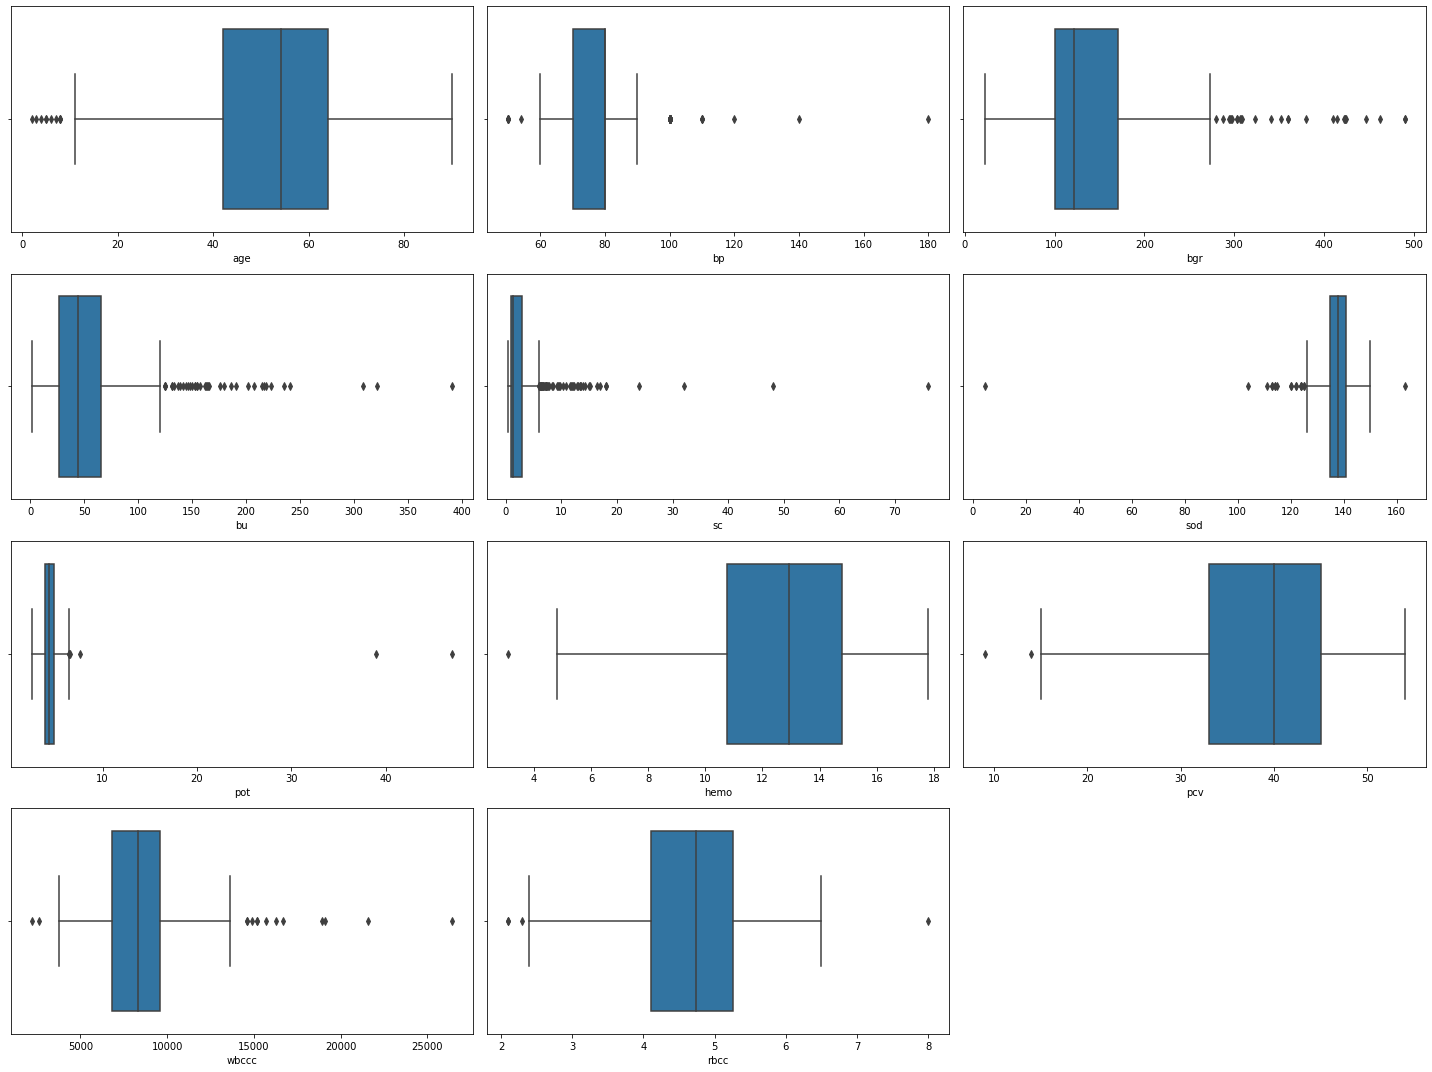

In [110]:
plt.figure(figsize=(20,15))
j=1
for i in df2.columns:
    plt.subplot(4,3,j)
    sns.boxplot(x=df2[i])
    j=j+1
    plt.tight_layout()

In [157]:
df2_ot=df2.copy()

In [158]:
#Outlier Treatment
#Capping the outliers #Winsorization
for i in df2_ot.columns:
    q1=df2_ot[i].quantile(0.25)
    q3=df2_ot[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=df2_ot[i].quantile(0.99)
    lc=df2_ot[i].quantile(0.01)
    for ind1 in df2_ot[i].index:
        if df2_ot.loc[ind1, i] >ub:            
            df2_ot.loc[ind1, i] =uc
        if df2_ot.loc[ind1, i] < lb:
            df2_ot.loc[ind1, i] =lc

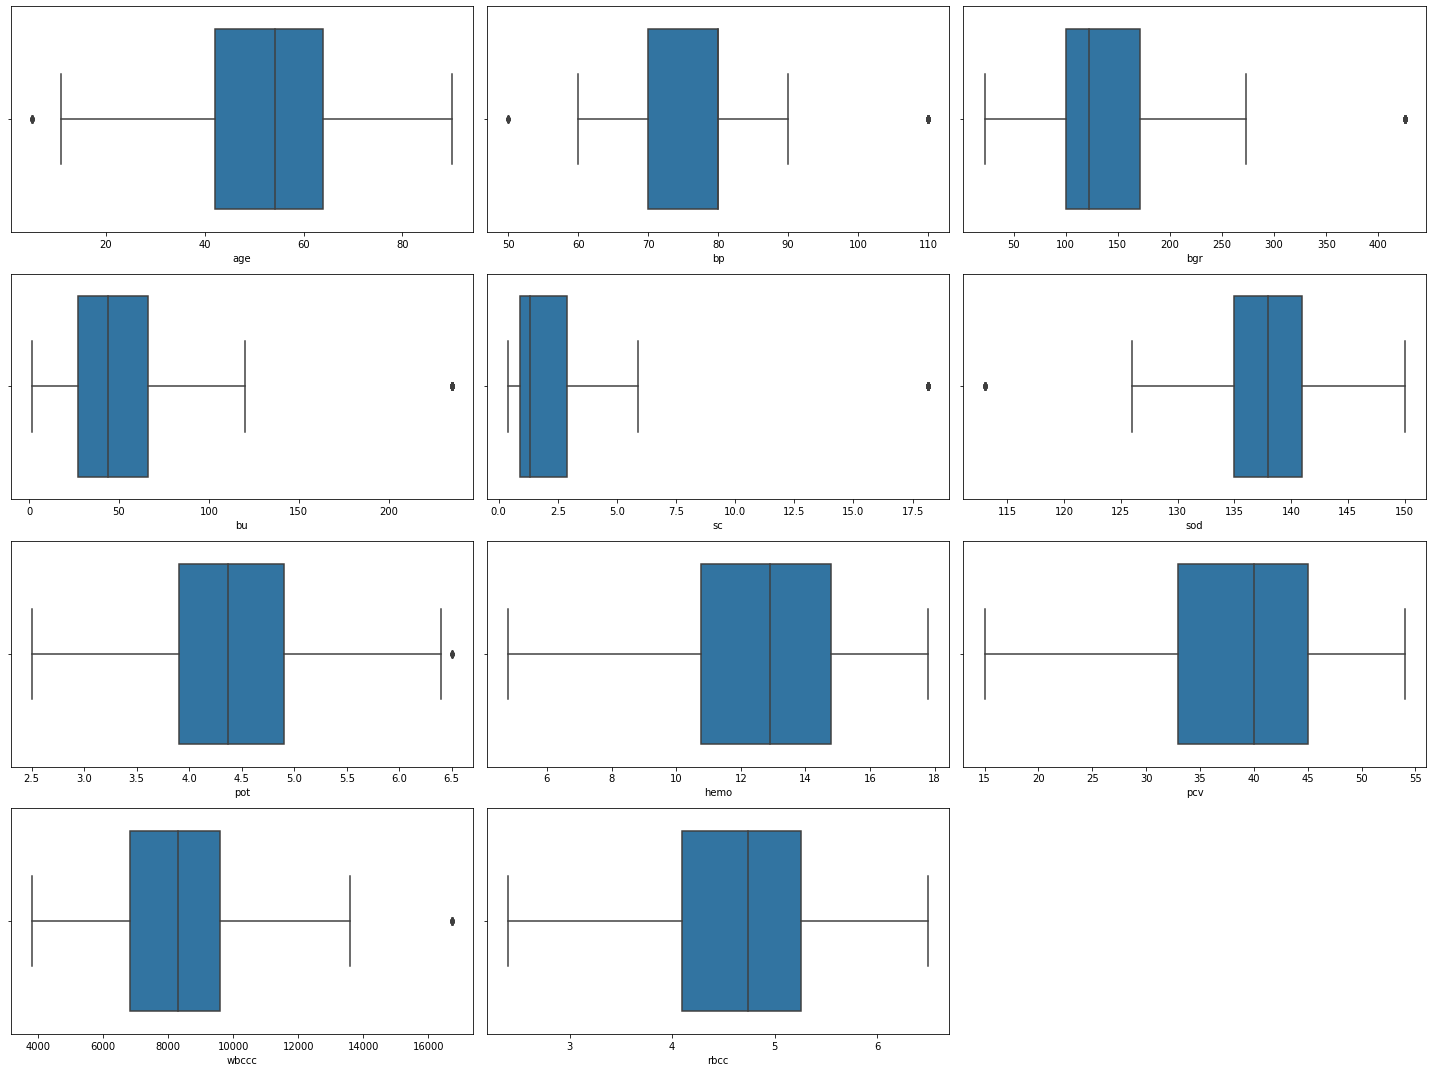

In [160]:
#Box plot after outlier treatment

plt.figure(figsize=(20,15))
j=1
for i in df2_ot.columns:
    plt.subplot(4,3,j)
    sns.boxplot(x=df2_ot[i])
    j=j+1
    plt.tight_layout()

In [91]:
# if df1['age']<(Q1-1.5*IQR):
#   df1['age']=df1['age'].quantile(0.05)

# from scipy.stats.mstats import winsorize
# df1['age'] = winsorize(df1['age'], limits=(0, 0.05), inplace=True, inclusive=(False, False))

In [111]:
inp=dfv2.drop(['class'], axis=1)
out=dfv2['class']

In [112]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(inp)
inp_sc=pd.DataFrame(inp_sc, columns=inp.columns, index=inp.index)
inp_sc.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,-0.203389,0.274543,-0.365435,-0.438173,-0.333460,0.134207,-0.095670,1.029280,0.602511,-0.250497,0.564886,0.467704,0.003882,-0.420997,-0.557151,-0.566529,-0.344158,-0.241249,1.310497,1.384923,-0.304789,-0.507801,-0.484322,-0.421567
1,-2.616277,-1.930625,-0.470103,-0.801400,-0.404567,-0.016739,-0.201911,-0.456652,-0.114124,-0.944767,0.298927,0.467704,2.333053,-0.420997,-0.557151,-0.566529,-0.344158,-0.241249,-0.766361,-0.724632,-0.304789,-0.507801,-0.484322,-0.421567


In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(inp_sc, out, test_size=0.3, random_state=99, stratify=out)

In [114]:
knn=KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred=knn.predict(xtest)

In [115]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        45
         1.0       1.00      0.89      0.94        75

    accuracy                           0.93       120
   macro avg       0.92      0.95      0.93       120
weighted avg       0.94      0.93      0.93       120



In [117]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn, inp, out, cv=5, scoring='f1')

In [118]:
score

array([0.65882353, 0.70454545, 0.68085106, 0.65909091, 0.64444444])

In [119]:
np.mean(score)*100

66.95510802644719

In [120]:
np.std(score)/np.mean(score)*100

3.137947601925297

In [121]:
mean_sc=[]
var_sc=[]
k=np.arange(1,11)
for k1 in k:
    knn_mod=KNeighborsClassifier(n_neighbors=k1)
    score=cross_val_score(knn_mod, inp_sc, out, cv=5, scoring='f1')
    mean_sc.append(np.mean(score))
    var_sc.append(np.std(score)/np.mean(score))

In [122]:
var_sc

[0.015041716046576782,
 0.016439528475054845,
 0.01963521941909929,
 0.020788097005419084,
 0.0202715672239045,
 0.02704529737130174,
 0.02703679444361176,
 0.031808982452864946,
 0.027857043153841562,
 0.031808982452864946]

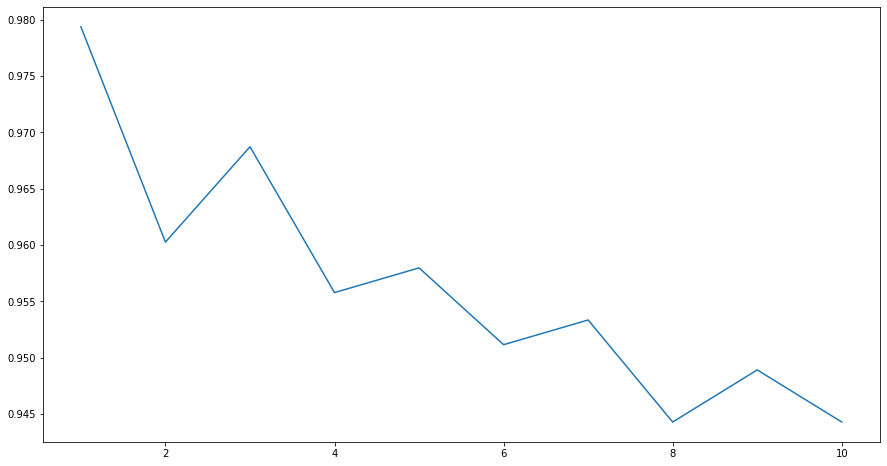

In [123]:
plt.plot(k,mean_sc)

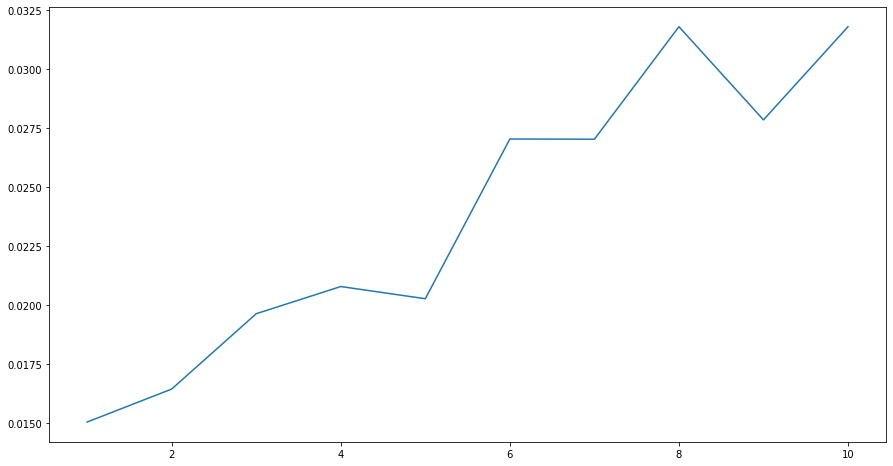

In [124]:
plt.plot(k,var_sc)

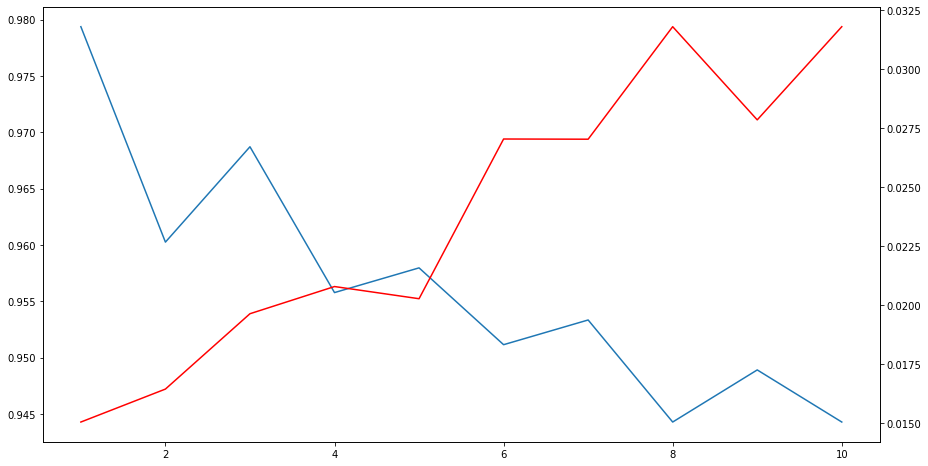

In [125]:
fig,ax1=plt.subplots()
ax1.plot(k,mean_sc)
ax2=ax1.twinx()
ax2.plot(k,var_sc,color='red')

In [126]:
from sklearn.model_selection import GridSearchCV
mod=KNeighborsClassifier()

params={'n_neighbors': [3,5,7,9,11,13,15],
       'p':[1,2,3,4,5],
       'weights':['uniform', 'distance']}

In [127]:
hyp_mod=GridSearchCV(mod, param_grid=params, scoring='f1')

In [128]:
tun_mod=hyp_mod.fit(xtrain, ytrain)

In [129]:
tun_mod.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}

In [130]:
tun_mod.best_score_

0.9763815195124124

In [146]:
res=pd.DataFrame(tun_mod.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003997,3.030918e-03,0.008802,7.294267e-03,3,1,uniform,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",1.000000,0.939394,0.923077,0.985507,0.923077,0.954211,0.032355,27
1,0.000000,0.000000e+00,0.006250,7.654947e-03,3,1,distance,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}",1.000000,0.939394,0.923077,0.985507,0.923077,0.954211,0.032355,27
2,0.000000,0.000000e+00,0.009375,7.654344e-03,3,2,uniform,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}",0.985507,0.970588,0.955224,0.985507,0.939394,0.967244,0.017880,11
3,0.003125,6.250000e-03,0.003125,6.249523e-03,3,2,distance,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}",0.985507,0.970588,0.955224,0.985507,0.939394,0.967244,0.017880,11
4,0.003125,6.249714e-03,0.015624,3.504023e-07,3,3,uniform,"{'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1
5,0.000000,0.000000e+00,0.015625,1.000222e-06,3,3,distance,"{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1
6,0.003125,6.249523e-03,0.015624,1.385292e-06,3,4,uniform,"{'n_neighbors': 3, 'p': 4, 'weights': 'uniform'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1
7,0.000000,0.000000e+00,0.015625,4.422006e-07,3,4,distance,"{'n_neighbors': 3, 'p': 4, 'weights': 'distance'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1
8,0.000000,0.000000e+00,0.015624,3.989506e-07,3,5,uniform,"{'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1
9,0.000000,0.000000e+00,0.015625,4.101908e-07,3,5,distance,"{'n_neighbors': 3, 'p': 5, 'weights': 'distance'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1


In [148]:
res.sort_values('std_test_score', ascending=True).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.003125,0.006251,0.016299,1.348877e-03,5,3,distance,"{'n_neighbors': 5, 'p': 3, 'weights': 'distance'}",0.985507,0.970588,0.955224,0.985507,0.955224,0.970410,0.013543,7
14,0.003125,0.006250,0.015625,3.989506e-07,5,3,uniform,"{'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}",0.985507,0.970588,0.955224,0.985507,0.955224,0.970410,0.013543,7
18,0.001659,0.001379,0.013673,4.271342e-03,5,5,uniform,"{'n_neighbors': 5, 'p': 5, 'weights': 'uniform'}",0.985507,0.970588,0.955224,0.985507,0.955224,0.970410,0.013543,7
19,0.006250,0.007654,0.009375,7.654656e-03,5,5,distance,"{'n_neighbors': 5, 'p': 5, 'weights': 'distance'}",0.985507,0.970588,0.955224,0.985507,0.955224,0.970410,0.013543,7
8,0.000000,0.000000,0.015624,3.989506e-07,3,5,uniform,"{'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}",0.985507,0.970588,0.955224,1.000000,0.970588,0.976382,0.015204,1


In [155]:
final_knn=KNeighborsClassifier(n_neighbors=3, p=5, weights='distance')

In [156]:
final_knn.fit(xtrain, ytrain)
ypred=final_knn.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.56      0.78      0.65        45
         1.0       0.83      0.64      0.72        75

    accuracy                           0.69       120
   macro avg       0.70      0.71      0.69       120
weighted avg       0.73      0.69      0.70       120



In [132]:
import statsmodels.api as sm

In [134]:
inpc=sm.add_constant(inp) #So we need this dummy constant#
mod=sm.Logit(out,inpc, max_iter=1000)
logr=mod.fit()
logr.summary()

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [135]:
df_cat.head()

,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,1.01,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,1.005,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,1.01,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(inp, out, test_size=0.3, random_state=99)

In [138]:
mod=LogisticRegression()
mod.fit(xtrain,ytrain)
ypred=mod.predict(xtest)
ypred

array([1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0.])

In [139]:
yprob=mod.predict_proba(xtest)
yprob[:10]#first 10 values. (1-p) and p values

array([[4.08986511e-09, 9.99999996e-01],
       [7.13466854e-01, 2.86533146e-01],
       [3.31352582e-04, 9.99668647e-01],
       [3.26845292e-07, 9.99999673e-01],
       [9.86449719e-01, 1.35502808e-02],
       [9.99679584e-01, 3.20416184e-04],
       [4.21048220e-05, 9.99957895e-01],
       [9.31543308e-04, 9.99068457e-01],
       [6.63672593e-01, 3.36327407e-01],
       [5.32864095e-01, 4.67135905e-01]])

In [140]:
mod.coef_

array([[-4.71778810e-02,  6.16330630e-02,  3.80110275e-02,
        -1.08809473e-02,  8.15202431e-01,  4.92445695e-02,
        -2.11235985e-01, -1.04760789e+00, -4.34879414e-02,
         2.99871928e-04, -8.85219626e-02,  9.72399930e-03,
         9.58731123e-01,  1.32890656e-01,  1.28010741e-01,
         7.41947365e-02,  1.89921152e-02,  2.55987525e-02,
         2.01954275e-01,  1.79751193e-01,  2.80577834e-02,
         1.13266386e-01,  2.09248619e-01,  3.79933984e-02]])

In [141]:
mod.intercept_

array([0.01474574])

In [142]:
mod1=LogisticRegression(C=1000000000000)
mod1.fit(xtrain,ytrain)
ypred=mod1.predict(xtest)

In [143]:
mod1.coef_

array([[-2.01325823e-02,  6.17495075e-02,  2.42518089e-02,
         3.01855155e-02,  1.89974445e-01,  5.64308406e-02,
        -3.91709416e-02, -2.69076464e-01, -2.88517192e-01,
         5.47290713e-05, -3.53524740e-02,  1.98863884e-03,
         1.95631614e-01,  2.32995976e-02,  2.56821826e-02,
         1.94901824e-02,  6.22925617e-03,  5.19364410e-03,
         4.57793943e-02,  3.93183904e-02,  7.35626003e-03,
         2.49250388e-02,  4.32300553e-02,  9.05611104e-03]])

## After Outlier Treatment and Rounding

In [183]:
dfv3=pd.concat([df2_ot, dfv2_cat],axis=1)
dfv3.head(3)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,121.00,36.0,1.2,138.8,4.3,15.4,44.0,7800.0,5.20,1.02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,5.0,50.0,113.00,18.0,0.8,137.4,4.0,11.3,38.0,6000.0,4.96,1.02,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,62.0,80.0,425.22,53.0,1.8,133.8,4.2,9.6,31.0,7500.0,3.80,1.01,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [187]:
inp3=dfv3.drop(['class'], axis=1)
out3=dfv3['class']

In [189]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp3_sc=sc.fit_transform(inp3)
inp3=pd.DataFrame(inp3_sc, columns=inp3.columns, index=inp3.index)
inp3.head(2)

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbccc,rbcc,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,-0.202059,0.247564,-0.368839,-0.443716,-0.458377,0.171949,-0.122326,1.034298,0.605257,-0.261749,0.577383,0.467704,0.003882,-0.420997,-0.557151,-0.566529,-0.344158,-0.241249,1.310497,1.384923,-0.304789,-0.507801,-0.484322,-0.421567
1,-2.727066,-1.940039,-0.460730,-0.741459,-0.529152,-0.026836,-0.555775,-0.462433,-0.118583,-1.001854,0.306209,0.467704,2.333053,-0.420997,-0.557151,-0.566529,-0.344158,-0.241249,-0.766361,-0.724632,-0.304789,-0.507801,-0.484322,-0.421567


In [190]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(inp3, out3, test_size=0.3, random_state=99, stratify=out)

In [192]:
knn3=KNeighborsClassifier()
knn3.fit(xtrain, ytrain)
ypred3=knn3.predict(xtest)
ypred3

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0.])

In [193]:
print(classification_report(ytest, ypred3))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        45
         1.0       1.00      0.91      0.95        75

    accuracy                           0.94       120
   macro avg       0.93      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



In [194]:
score=cross_val_score(knn, inp, out, cv=5, scoring='f1')
score

array([0.65882353, 0.70454545, 0.68085106, 0.65909091, 0.64444444])

In [195]:
np.mean(score)

0.669551080264472

In [196]:
np.std(score)/np.mean(score)

0.03137947601925297

In [197]:
mean_sc=[]
var_sc=[]
k=np.arange(1,11)
for k1 in k:
    knn_mod=KNeighborsClassifier(n_neighbors=k1)
    score=cross_val_score(knn_mod, inp3, out3, cv=5, scoring='f1')
    mean_sc.append(np.mean(score))
    var_sc.append(np.std(score)/np.mean(score))

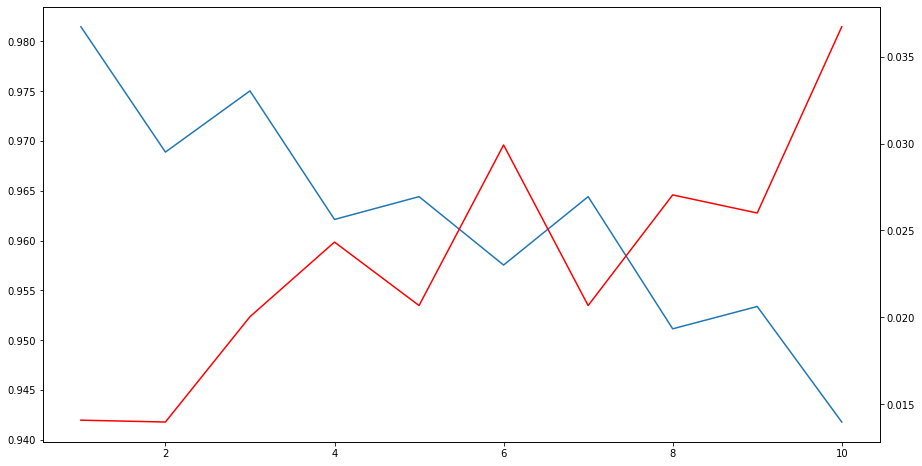

In [199]:
plt.plot(k,mean_sc)
plt.twinx()
plt.plot(k,var_sc,color='red')
plt.show()

## Logistic Regression

In [200]:
inpc=sm.add_constant(inp3) #We need this dummy constant#
mod=sm.Logit(out3,inpc)
logr=mod.fit()
logr.summary()

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix